## colab에서 실행하기 위해 설치 및 설정해야 할 사항

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5"

/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5


In [ ]:
!pwd

/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5


In [ ]:
ls

CONTRIBUTING.md  ICDAR2015/         README.md         train/
data/            LICENSE            requirements.txt  train.py
detect.py        matrix_quotes.txt  runs/             tutorial.ipynb
Dockerfile       models/            setup.cfg         utils/
export.py        output.txt         stdout.txt        val.py
hubconf.py       __pycache__/       test.csv          yolov5s.pt


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 7.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install --upgrade albumentations

     |████████████████████████████████| 102 kB 7.0 MB/s 
     |████████████████████████████████| 47.7 MB 38.7 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.8 MB/s 


In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = 'https://ultralytics.com/images/zidane.jpg'

# Inference
results = model(img)

a = results.pandas().xyxy[0]

print(a)

results.save()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp30


         xmin        ymin         xmax        ymax  confidence  class    name
0  742.974731   48.395569  1141.844482  720.000000    0.881052      0  person
1  442.007629  437.522400   496.653992  709.973572    0.675213     27     tie
2  123.024139  193.287354   715.662231  719.723877    0.665814      0  person
3  982.803162  308.417358  1027.365845  419.987000    0.260075     27     tie


### 최종 코드

In [ ]:
import torch
import pandas as pd
import sys
import pickle
import albumentations as A
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


# Model_nano

#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/train/exp5/weights/best.pt')

for num in range(1, 21):
  # Image
  img_num = str(num)
  img = '/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/ICDAR2015/images/test_icdar/img_' + img_num + '.jpg'

  # Inference
  results = model(img)

  #print(results.type)
  a = results.pandas().xyxy[0]

  rst = []
  for i in range(len(a)):
    tmp = []
    row_i = a.iloc[i]
    tmp.append(row_i['xmin'])
    tmp.append(row_i['ymin'])
    tmp.append(row_i['xmax'])
    tmp.append(row_i['ymax'])
    tmp.append(row_i['name'])
    rst.append(tmp)


  img_path =  '/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/ICDAR2015/images/test_icdar/img_' + img_num + '.jpg'
  image = plt.imread(img_path)
  print(image.shape)
  print(image.shape[0])
  plt.imshow(image)
  bbox = []
  transform = {}
  transformed_image = []
  transformed_bboxes = []
  for i in range(len(rst)):
    bbox = []
    transform = {}
    transformed_image = []
    transformed_bboxes = []
    xmin, ymin, xmax, ymax = rst[i][:-1]
    bbox = [[xmin, ymin, xmax, ymax, rst[i][-1]]]

    transform = A.Compose([
        A.HorizontalFlip(p=0),
    ], bbox_params=A.BboxParams(format='pascal_voc'))

    transformed = transform(image=image, bboxes=bbox)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']
    print(transformed_bboxes)

    # 이미지 출력
    #plt.imshow(transformed_image)
    #plt.savefig('/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/runs/savefig_default_3.jpg')

    # bounindg box 그리기
    for transformed_bbox in transformed_bboxes:
        xmin, ymin, xmax, ymax, category = transformed_bbox
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='red', fill=False)
        ax = plt.gca()
        ax.add_patch(rect)

  plt.xticks([]); plt.yticks([])
  plt.show()
  #plt.figure(figsize=(720, 1280))
  rst_path = '/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/runs/test_yolov5x/rst_' + img_num + '.jpg'
  plt.savefig(rst_path, dpi=600)
  transformed_bboxes = []
  plt.clf()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-7 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients
Adding AutoShape... 


(720, 1280, 3)
720
[(932.88671875, 253.94519042968753, 954.5426025390625, 279.15625, 'Text')]
[(136.62962341308594, 341.1602478027344, 202.71791076660156, 356.4251403808594, 'Text')]
[(117.40545654296875, 294.6393127441406, 136.5059051513672, 306.7439270019531, 'Text')]
[(332.5809326171875, 301.7518005371094, 364.03411865234375, 312.3610534667969, 'Text')]
[(813.7800903320312, 657.6516723632812, 853.3803100585938, 683.4865112304688, 'Text')]
(720, 1280, 3)
720
[(788.3426513671875, 333.7398986816406, 866.8597412109375, 364.6801452636719, 'Text')]
[(787.1888427734375, 282.84625244140625, 818.297607421875, 297.6265869140625, 'Text')]
[(793.5289916992188, 299.4520568847656, 908.2794799804688, 335.7899475097656, 'Text')]
[(821.0869140625, 284.0765075683594, 876.5081787109375, 300.5306701660156, 'Text')]
[(698.6793823242188, 139.78309631347656, 725.5632934570312, 157.0957794189453, 'Text')]
[(665.585693359375, 137.0631866455078, 695.13671875, 154.45469665527344, 'Text')]
[(635.8145751953125,

(720, 1280, 3)
720


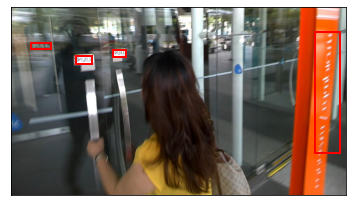

<Figure size 432x288 with 0 Axes>

In [ ]:
import albumentations as A
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

img_path = '/content/drive/MyDrive/!YAI_OCRdistill/ch4_training_images/img_' + img_num + '.jpg'
image = plt.imread(img_path)
print(image.shape)
print(image.shape[0])
plt.imshow(image)
for i in range(len(rst)):
  xmin, ymin, xmax, ymax = rst[i][:-1]
  bbox = [[xmin, ymin, xmax, ymax, rst[i][-1]]]

  transform = A.Compose([
      A.HorizontalFlip(p=0),
  ], bbox_params=A.BboxParams(format='pascal_voc'))

  transformed = transform(image=image, bboxes=bbox)
  transformed_image = transformed['image']
  transformed_bboxes = transformed['bboxes']

  # 이미지 출력
  #plt.imshow(transformed_image)
  #plt.savefig('/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/runs/savefig_default_3.jpg')

  # bounindg box 그리기
  for transformed_bbox in transformed_bboxes:
      xmin, ymin, xmax, ymax, category = transformed_bbox
      rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='red', fill=False)
      ax = plt.gca()
      ax.add_patch(rect)

plt.xticks([]); plt.yticks([])
plt.show()
#plt.figure(figsize=(720, 1280))
rst_path = '/content/drive/MyDrive/연대/YAI/2022산학협력/code/yolov5/runs/test_yolov5n/rst_' + img_num + '.jpg'
plt.savefig(rst_path, dpi=600)

___